# Практическая работа 3 Обучение без учителя

## Часть 1 Подготовка датасета

### Подключение библиотек

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import MDS

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score 
from sklearn.metrics import davies_bouldin_score 

from sklearn.preprocessing import LabelEncoder

%matplotlib inline

ModuleNotFoundError: No module named 'yellowbrick'

### Загрузка датасета

In [2]:
df = pd.read_csv('iris.csv')

### Обработка датасета

In [3]:
#Сначала посмотреть
print(df.shape)
print(df.head())
print(df.info())
print(df.describe())
print(df.describe(include='object'))

(150, 5)
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.00

In [4]:
# Сначала удаляем лишние поля (если это сказано в варианте)
# df=df.drop(['case'], axis=1)
# Удаление пустых объектов
df=df.dropna()
# Замена текста, будем использовать новую технику
le = LabelEncoder()
df.species=le.fit_transform(df.species)

# Если есть текстовое поле, у которого только два значения, то вот так:
#df = pd.get_dummies(df).drop("sex_.", axis=1)
print(df.info())

# Делаем датасет с индексами для вывода графиков
df_ind=df.reset_index()
#И вернём назад текст
df_ind.species=le.inverse_transform(df.species)
print(df_ind.info())
print(df_ind.head())
# Иные манипуляции. Все они должны быть обоснованы в комментарии

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
   index  sepal_length  s

In [5]:
# Вывести информаицю о датасете - информацию о полях, графики признаков

## Часть 1 Поиск аномалий

### Используемый метод поиска аномалий
Поменяйте заголовок на тот метод, что будете использовать

In [6]:
# Пример для локального уровня выброса
LOF=LocalOutlierFactor()
Anomaly=LOF.fit_predict(df)
df_clear=df[Anomaly>0]

Отображение результатов - выведите результаты с отображением аномалий

In [7]:
# Вывод графика по ТРЁМ признакам с отображением аномалий

Сохранение результатов и скалирование датасета

In [8]:
scaler=StandardScaler()
X=scaler.fit_transform(df_clear)
df_scale = pd.DataFrame(data=X, columns=df.columns)

### Вывод

Нашлись ли аномалии? Насколько хорошо? 

## Часть 2 Понижение размерности

### Используемый метод понижения размерности
Поменяйте заголовок на тот метод, что будете использовать

In [9]:
# пример для PCA
pca = PCA(n_components=2)
df_PCA = pca.fit_transform(df_scale)
df_PCA=pd.DataFrame(df_PCA)
print(df_PCA.head())

          0         1
0 -2.615835  0.466977
1 -2.404895 -0.760289
2 -2.677485 -0.401955
3 -2.611320 -0.671958
4 -2.737608  0.647015


Вывод результатов

In [10]:
# тут сами

### Дополнительный метод


In [11]:
#Хотите доп. балл? Ещё один любой метод!

In [12]:
#Визуализация результатов другого метода

### Вывод по результатам понижения размерности

Сколько кластеров теперь видно? Сколько получилось признаков? Если использовалось два метода, то какой себя показал лучше?

## Часть 4 Кластеризация

### Используемый метод кластеризации
Поменяйте заголовок на тот метод, что будете использовать

#### Сжатый датасет

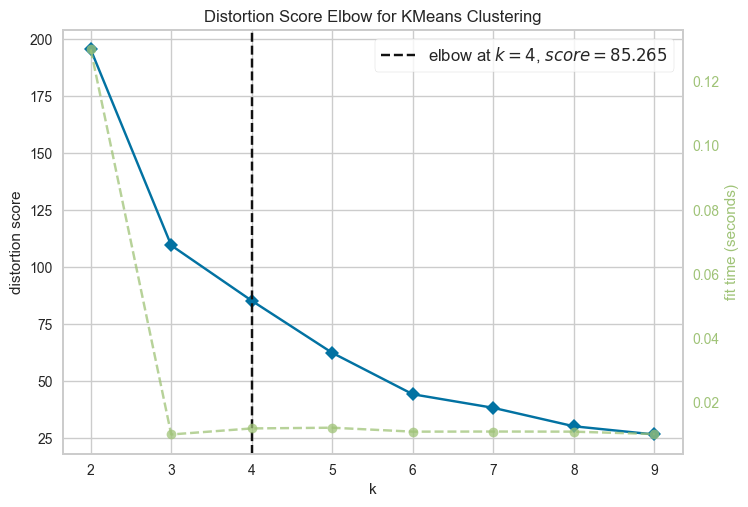

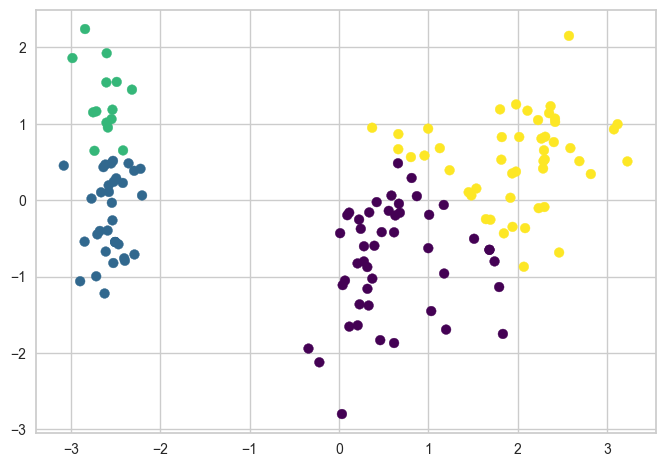

In [13]:
#пример для k-средних
# при использовании этого метода ОБЯЗАТЕЛЬНО построение графика "локтя"
# при использовании агломеративного алгоритма - обязательно построение дендрограммы
kmeans=KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(df_PCA)  
n_clusters=visualizer.elbow_value_
visualizer.show()
kmeans=KMeans(n_clusters=n_clusters,random_state=42)
kmeans.fit(df_PCA)
kmeans_res_psa=kmeans.labels_
plt.scatter(df_PCA[0],df_PCA[1],c=kmeans_res_psa, cmap="viridis")
plt.show()

Метрики качества кластеризации

In [14]:
ss = silhouette_score(df_PCA, kmeans_res_psa) 
print(ss) 
dbs = davies_bouldin_score(df_PCA, kmeans_res_psa) 
print(dbs) 

0.4645725536032211
0.7252834140404305


Изначальные признаки, разбитые на кластеры

In [15]:
# Вывести графики хотя бы ТРЁХ признаков изначального датасета с выделением цветом различных кластеров

#### Изначальный датасет

In [16]:
# Повторить разбиение тем же методом, но для изначального датасета до понижения размерности.

In [17]:
# Вывод метрик

In [18]:
# Вывод графиков

### Дополнительный метод

In [19]:
#Хотите доп. балл? Ещё один любой метод!

In [20]:
#Визуализация результатов и метрики другого метода

In [21]:
# Вывести графики хотя бы ТРЁХ признаков изначального датасета с выделением цветом различных кластеров

### Вывод по результатам понижения размерности

Сколько кластеров удалось получить? Почему именно эти? Насколько это можно понять по изначальному датасету? Если использовалось несколько методов, то какой показал себя лучше?